# EXAMPLE 1

## Libraries

In [1]:
#!pip install parepy_toolbox
#!pip install pandas
#!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)

from parepy_toolbox import sampling_algorithm_structural_analysis, convergence_probability_failure
from obj_function import nowak_collins_example

## Check structural reliability 

In [2]:
f = {
        'type': 'normal', 
        'parameters': {'mean': 40.3, 'sigma': 4.64}, 
        'stochastic variable': False, 
    }

p = {
        'type': 'gumbel max',
        'parameters': {'mean': 10.2, 'sigma': 1.12}, 
        'stochastic variable': False, 
    }

w = {
        'type': 'lognormal',
        'parameters': {'mean': 0.25, 'sigma': 0.025}, 
        'stochastic variable': False, 
    }
var = [f, p, w]

## PAREpy setup

In [3]:
setup = {
             'number of samples': 100000, 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': 'nowak_collins_example',
        }

## Run algorithm

In [4]:
results, pf, beta = sampling_algorithm_structural_analysis(setup)

12:12:45 - Checking inputs completed!
12:12:45 - Started State Limit Function evaluation (g)...
12:12:47 - Finished State Limit Function evaluation (g) in 1.89e+00 seconds!
12:12:47 - Started evaluation beta reliability index and failure probability...
12:12:47 - Finished evaluation beta reliability index and failure probability in 7.26e-03 seconds!
12:12:47 - Voilà!!!!....simulation results are saved in nowak_collins_example_MCS_20241217-121247.txt


## Convergence rate

In [5]:
x, m, l, u, var = convergence_probability_failure(results, 'I_0')

## Output

In [14]:
print('x:', x)
print('m:', m)
print('l:', l)
print('u:', u)
print('var:', var)

x: [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000]
m: [np.float64(0.0), np.float64(0.0005), np.float64(0.001), np.float64(0.00075), np.float64(0.0012), np.float64(0.0011666666666666668), np.float64(0.0012857142857142856), np.float64(0.00125), np.float64(0.0013333333333333333), np.float64(0.0014), np.float64(0.0014545454545454545), np.float64(0.001416666

## Plot results

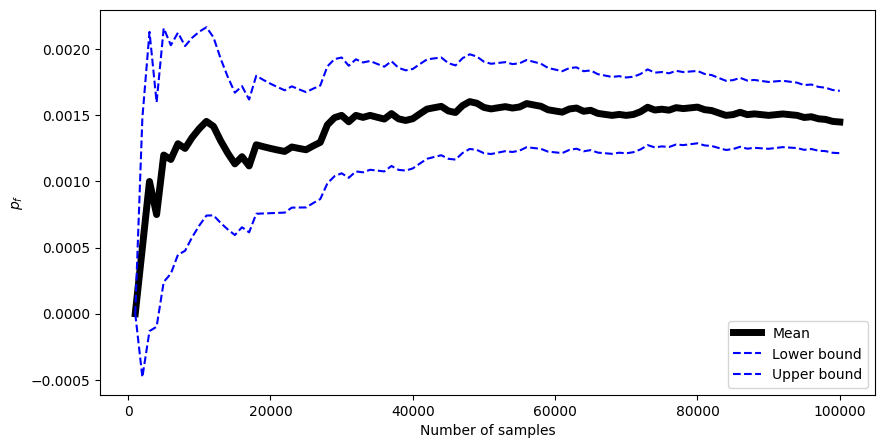

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(x, m, label='Mean', color='black', linewidth=5)
plt.plot(x, l, label='Lower bound', linestyle='--', color='blue')
plt.plot(x, u, label='Upper bound', linestyle='--', color='blue')

plt.xlabel('Number of samples')
plt.ylabel('$p_f$')
plt.legend()
plt.show()